In [5]:
#Prototyping Keras
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
import pandas as pd
import matplotlib.pyplot as plt
from keras import models, layers


keras.__version__

#Pull CSV from Git
gamesDF = pd.read_csv("https://github.com/bgweber/Twitch/raw/master/Recommendations/games-expand.csv")  
gamesDF.head() 

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,label
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,1,0,0,1,1
4,0,0,1,0,1,1,0,1,1,0,1


In [10]:
#split and prep
x_train, x_test, y_train, y_test = train_test_split(
    gamesDF.drop(['label'],axis=1),gamesDF['label'],test_size=0.3)

#define the network structure
model = models.Sequential()
model.add(layers.Dense(64,activation='relu', input_shape=(10,)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#Define ROC AUC as a metric
def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true,y_pred)[1]
    keras.backend.get_session().run(
                    tf.local_variables_initializer())
    return auc

#Compile and fit the model
model.compile(optimizer ='rmsprop',
                    loss = 'binary_crossentropy',metrics=[auc] )
history = model.fit(x_train, y_train, epochs=100, batch_size=100,validation_split = .2, verbose=0)







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


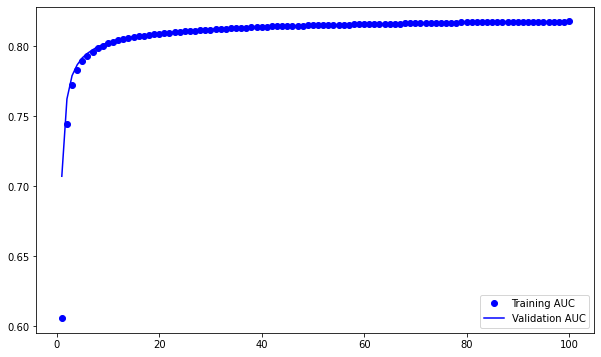

In [11]:
#Plot results
loss = history.history['auc']
val_loss = history.history['val_auc']
epochs = range(1,len(loss)+1)

plt.figure(figsize=(10,6))
plt.plot(epochs, loss, 'bo', label='Training AUC')
plt.plot(epochs, val_loss, 'b' ,label='Validation AUC' )
plt.legend()
plt.show()

In [13]:
#ROC Metric
results = model.evaluate(x_test,y_test, verbose=0)
print("ROC: " + str(results[1]))

ROC: 0.8175978628664827
